In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Google = pd.read_csv("GOOG.csv")
Google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-12,536.296875,537.971008,531.046082,531.522949,531.522949,3213600
1,2013-12-13,534.225403,534.667480,525.526978,526.967590,526.967590,4352800
2,2013-12-16,528.562195,533.872681,527.573669,533.023193,533.023193,3224800
3,2013-12-17,532.943726,536.888062,530.738037,531.473267,531.473267,3091300
4,2013-12-18,532.461853,538.969543,526.098267,538.870178,538.870178,4449300


In [3]:
MF = pd.read_csv("MSFT.csv")
MF.headd()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-16,36.730000,37.000000,36.540001,36.889999,32.712261,31734200
1,2013-12-17,36.939999,37.110001,36.330002,36.520000,32.384151,45687700
2,2013-12-18,36.360001,36.599998,35.529999,36.580002,32.437366,63192100
3,2013-12-19,36.509998,36.549999,36.080002,36.250000,32.144733,34160100
4,2013-12-20,36.200001,36.930000,36.189999,36.799999,32.632454,62649100


# 合併資料
## merge(資料1,資料2,on=’欄位依據’,how=’合併方法’)

# 採用how=’left’時，沒有值的時候會自動補上”NaN”
# 採用how=’inner’時，則會顯示兩者資料皆有日期的部分才會顯示，就是取交集的意思。

In [4]:
df1 = pd.merge(Google, MF,on="Date", how="left")
df1.head()

,Date,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
0,2013-12-12,536.296875,537.971008,531.046082,531.522949,531.522949,3213600,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-12-13,534.225403,534.667480,525.526978,526.967590,526.967590,4352800,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-12-16,528.562195,533.872681,527.573669,533.023193,533.023193,3224800,36.730000,37.000000,36.540001,36.889999,32.712261,31734200.0
3,2013-12-17,532.943726,536.888062,530.738037,531.473267,531.473267,3091300,36.939999,37.110001,36.330002,36.520000,32.384151,45687700.0
4,2013-12-18,532.461853,538.969543,526.098267,538.870178,538.870178,4449300,36.360001,36.599998,35.529999,36.580002,32.437366,63192100.0


In [5]:
df2 = pd.merge(Google, MF,on="Date", how="inner")
df2.head()

,Date,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
0,2013-12-16,528.562195,533.872681,527.573669,533.023193,533.023193,3224800,36.730000,37.000000,36.540001,36.889999,32.712261,31734200
1,2013-12-17,532.943726,536.888062,530.738037,531.473267,531.473267,3091300,36.939999,37.110001,36.330002,36.520000,32.384151,45687700
2,2013-12-18,532.461853,538.969543,526.098267,538.870178,538.870178,4449300,36.360001,36.599998,35.529999,36.580002,32.437366,63192100
3,2013-12-19,536.893005,542.466797,536.053467,539.600403,539.600403,3353000,36.509998,36.549999,36.080002,36.250000,32.144733,34160100
4,2013-12-20,540.633728,547.027100,540.484680,546.753906,546.753906,6565600,36.200001,36.930000,36.189999,36.799999,32.632454,62649100


1. 讀取資料
2. 將index設定為日期
3. 取出我們想到的欄位，比方說在這裡我們取調整後收盤價及成交量
4. 將欄位重新命名

In [8]:
Google = pd.read_csv("GOOG.csv")
Google.set_index(pd.to_datetime(Google["Date"], format='%Y-%m-%d'), inplace=True)
Google = Google[["Adj Close", "Volume"]]
Google.rename(columns={"Adj Close":"GOOG_P","Volume":"GOOG_V"}, inplace=True)
Google.head()

,GOOG_P,GOOG_V
Date,,
2013-12-12,531.522949,3213600
2013-12-13,526.967590,4352800
2013-12-16,533.023193,3224800
2013-12-17,531.473267,3091300
2013-12-18,538.870178,4449300


In [10]:
MF = pd.read_csv('MSFT.csv')
MF.set_index(pd.to_datetime(MF["Date"], format='%Y-%m-%d'), inplace=True)
MF=MF[["Adj Close","Volume"]]
MF.rename(columns = {"Adj Close":"MSFT_P","Volume":"MSFT_V"}, inplace=True)
MF.head()

,MSFT_P,MSFT_V
Date,,
2013-12-16,32.712261,31734200
2013-12-17,32.384151,45687700
2013-12-18,32.437366,63192100
2013-12-19,32.144733,34160100
2013-12-20,32.632454,62649100


# 合併資料

In [11]:
df = pd.merge(Google, MF, left_index = True, right_index = True, how='inner')
df.head()

,GOOG_P,GOOG_V,MSFT_P,MSFT_V
Date,,,,
2013-12-16,533.023193,3224800,32.712261,31734200
2013-12-17,531.473267,3091300,32.384151,45687700
2013-12-18,538.870178,4449300,32.437366,63192100
2013-12-19,539.600403,3353000,32.144733,34160100
2013-12-20,546.753906,6565600,32.632454,62649100


<AxesSubplot:xlabel='Date'>

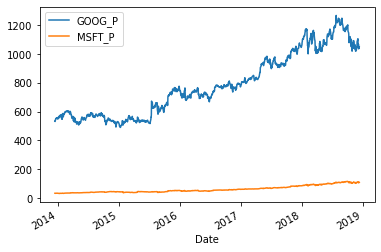

In [12]:
df[["GOOG_P", "MSFT_P"]].plot()

# 累計報酬計算

In [16]:
df_price = df[["GOOG_P", "MSFT_P"]]
df_dr = np.log(df_price).diff(1)               #取log相減，算出每天的log return
df_dr.head()

,GOOG_P,MSFT_P
Date,,
2013-12-16,NaN,NaN
2013-12-17,-0.002912,-0.010081
2013-12-18,0.013822,0.001642
2013-12-19,0.001354,-0.009062
2013-12-20,0.013170,0.015059


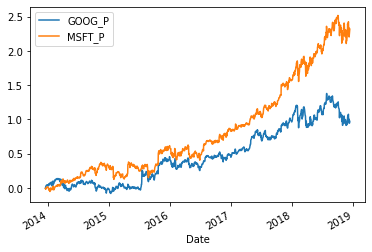

In [15]:
df_dr.dropna(inplace=True)
df_TR = np.exp(np.cumsum(df_dr))-1           #cumsum函數把每日的log return加總，取exp-1
df_TR.plot()
plt.show()